In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
from sklearn.model_selection import train_test_split
import math
from PIL import Image
from sklearn import tree

In [0]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

In [0]:
import os
import plotly.io as pio
pio.templates.default = 'plotly_white'

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
fid = drive.ListFile({'q':"title='german_data.csv'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile("german_data.csv")

Pre-Processing

In [0]:
columns = ["StatusExist", "DurationInMonth", "CreditHistory", "Purpose","CreditAmount","SavingsAccount","EmploymentSince"
                  ,"InstallmentRate","StatusAndSex","DebtorsGuarantors","PresentResidenceSince","Property","AgeInYears","OtherInstallPlans",
                  "Housing","No.ExistingCredits","Job","No.LiableProvideMaintenance","Telephone","ForeignWorker","Target"]

In [0]:
df = pd.read_csv("german_data.csv", 
                  sep='\t', 
                  delimiter=',',
                  names=columns)

In [11]:
df.head()

StatusExist  DurationInMonth CreditHistory  ... Telephone  ForeignWorker Target
0         A11                6           A34  ...      A192           A201      1
1         A12               48           A32  ...      A191           A201      2
2         A14               12           A34  ...      A191           A201      1
3         A11               42           A32  ...      A191           A201      1
4         A11               24           A33  ...      A191           A201      2

[5 rows x 21 columns]

In [12]:
df.isnull().sum()

StatusExist                    0
DurationInMonth                0
CreditHistory                  0
Purpose                        0
CreditAmount                   0
SavingsAccount                 0
EmploymentSince                0
InstallmentRate                0
StatusAndSex                   0
DebtorsGuarantors              0
PresentResidenceSince          0
Property                       0
AgeInYears                     0
OtherInstallPlans              0
Housing                        0
No.ExistingCredits             0
Job                            0
No.LiableProvideMaintenance    0
Telephone                      0
ForeignWorker                  0
Target                         0
dtype: int64

In [13]:
# --1--
d = {'A11': 1, 'A12': 2,'A13': 3,'A14': 4}
df['StatusExist'] = df['StatusExist'].map(d)
# ---2---
#--3--
d = {'A30': 1, 'A31': 2,'A32': 3,'A33': 4,'A34': 5}
df['CreditHistory'] = df['CreditHistory'].map(d)
#--4--
d = {'A40': 1, 'A41': 2,'A42': 3,'A43': 4,'A44': 5, 'A45': 6,'A46': 7,'A47': 8,'A48': 9, 'A49':10,'A410': 11}
df['Purpose'] = df['Purpose'].map(d)
#--5--
#--6--
d = {'A61': 1, 'A62': 2,'A63': 3,'A64': 4,'A65': 5}
df['SavingsAccount'] = df['SavingsAccount'].map(d)
#--7--
d = {'A71': 1, 'A72': 2,'A73': 3,'A74': 4,'A75': 5}
df['EmploymentSince'] = df['EmploymentSince'].map(d)
#--8--
#--9--
d = {'A91': 1, 'A92': 2,'A93': 3,'A94': 4,'A95': 5}
df['StatusAndSex'] = df['StatusAndSex'].map(d)
#--10--
d = {'A101': 1, 'A102': 2,'A103': 3}
df['DebtorsGuarantors'] = df['DebtorsGuarantors'].map(d)
#--11--
#--12--
d = {'A121': 1, 'A122': 2,'A123': 3,'A124': 4}
df['Property'] = df['Property'].map(d)
#--13--
#--14--
d = {'A141': 1, 'A142': 2,'A143': 3}
df['OtherInstallPlans'] = df['OtherInstallPlans'].map(d)
#--15--
d = {'A151': 1, 'A152': 2,'A153': 3}
df['Housing'] = df['Housing'].map(d)
#--16--
#--17--
d = {'A171': 1, 'A172': 2,'A173': 3,'A174': 4}
df['Job'] = df['Job'].map(d)
#--18--
#--19--
d = {'A191': 1, 'A192': 2}
df['Telephone'] = df['Telephone'].map(d)
#--20--
d = {'A201': 1, 'A202': 0}
df['ForeignWorker'] = df['ForeignWorker'].map(d)
#--21--
d = {1: 1, 2: 0}
df['Target'] = df['Target'].map(d)
df.head()

StatusExist  DurationInMonth  ...  ForeignWorker  Target
0            1                6  ...              1       1
1            2               48  ...              1       0
2            4               12  ...              1       1
3            1               42  ...              1       1
4            1               24  ...              1       0

[5 rows x 21 columns]

In [14]:
features = list(df.columns[:20])
features

['StatusExist',
 'DurationInMonth',
 'CreditHistory',
 'Purpose',
 'CreditAmount',
 'SavingsAccount',
 'EmploymentSince',
 'InstallmentRate',
 'StatusAndSex',
 'DebtorsGuarantors',
 'PresentResidenceSince',
 'Property',
 'AgeInYears',
 'OtherInstallPlans',
 'Housing',
 'No.ExistingCredits',
 'Job',
 'No.LiableProvideMaintenance',
 'Telephone',
 'ForeignWorker']

In [0]:
y = df["Target"]
X = df[features]
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.27)

**Decision** **Tree**

In [0]:
decision_model = tree.DecisionTreeClassifier()
decision_model = decision_model.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



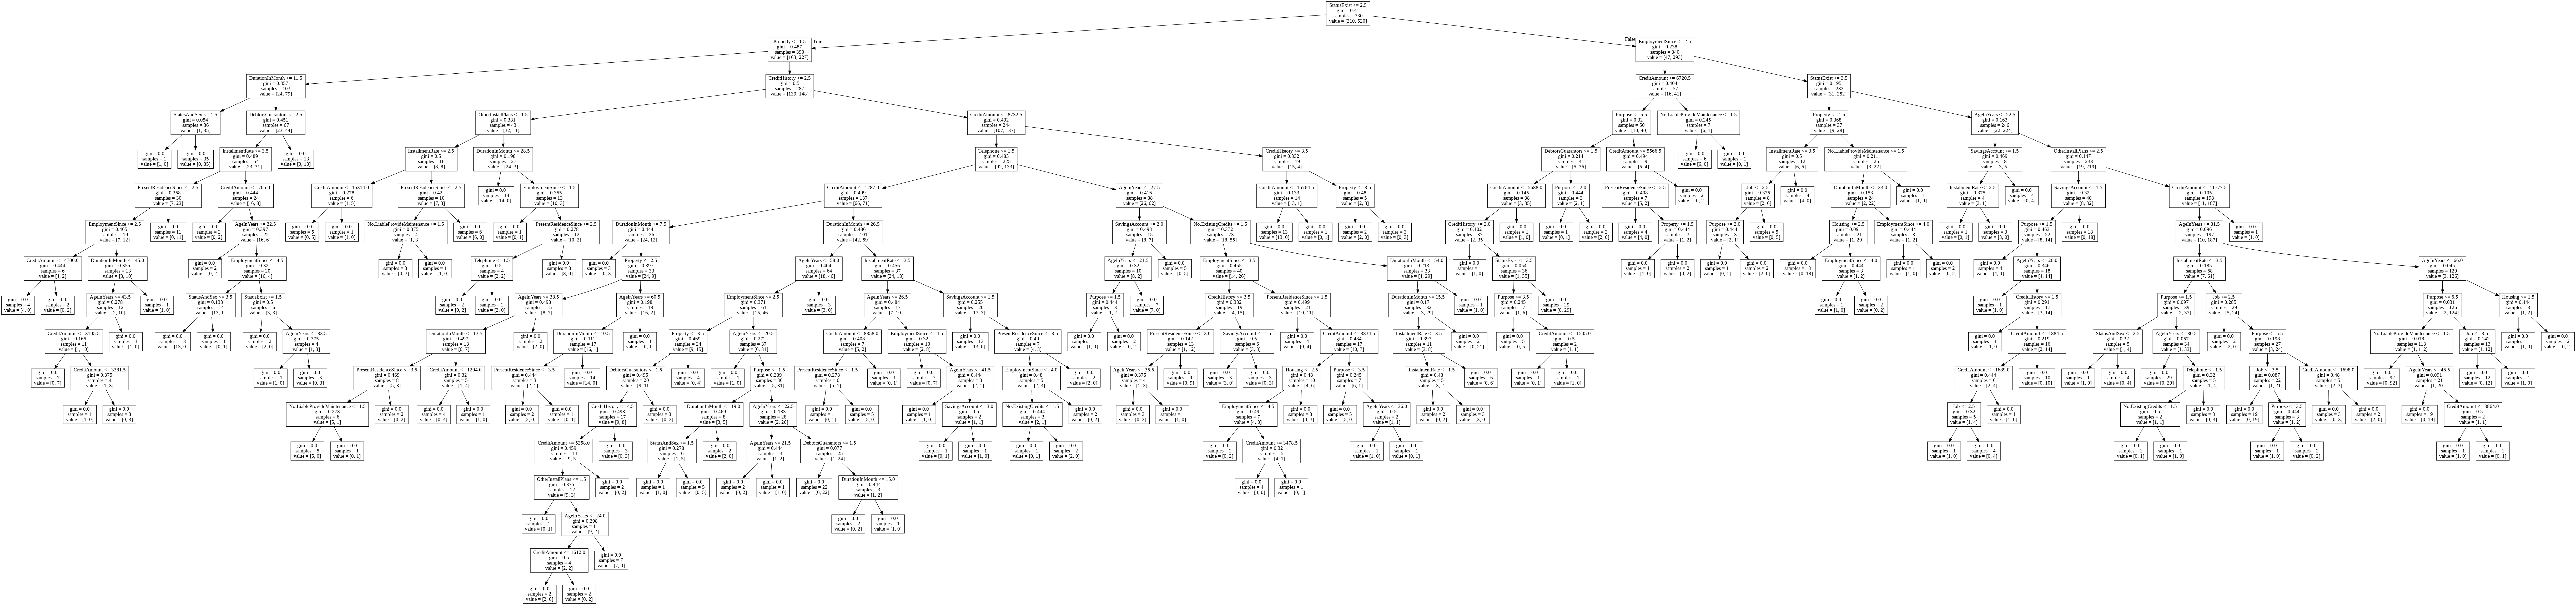

In [17]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(decision_model, out_file=dot_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [0]:
Y_predict_decision = decision_model.predict(X_test)

In [19]:
print(classification_report(Y_test,Y_predict_decision))

              precision    recall  f1-score   support

           0       0.51      0.48      0.49        90
           1       0.75      0.77      0.76       180

    accuracy                           0.67       270
   macro avg       0.63      0.62      0.63       270
weighted avg       0.67      0.67      0.67       270



**Random Forest**

In [0]:
randomForest = RandomForestClassifier(n_estimators=30)
randomForest = randomForest.fit(X_train, Y_train)

Y_predict_random = randomForest.predict(X_test)

In [21]:
print(classification_report(Y_test,Y_predict_random))

              precision    recall  f1-score   support

           0       0.72      0.48      0.57        90
           1       0.78      0.91      0.84       180

    accuracy                           0.76       270
   macro avg       0.75      0.69      0.70       270
weighted avg       0.76      0.76      0.75       270



**GradientBoost**

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

In [0]:
gradient = GradientBoostingClassifier()
gradient = gradient.fit(X_train, Y_train)

Y_predict_gradient = gradient.predict(X_test)


In [24]:
print(classification_report(Y_test,Y_predict_gradient))

              precision    recall  f1-score   support

           0       0.68      0.48      0.56        90
           1       0.77      0.89      0.83       180

    accuracy                           0.75       270
   macro avg       0.73      0.68      0.69       270
weighted avg       0.74      0.75      0.74       270



**AdaBoost**

In [0]:
from sklearn.ensemble import AdaBoostClassifier

In [0]:
ada_model = AdaBoostClassifier()
ada_model = ada_model.fit(X_train, Y_train)

Y_predict_ada = ada_model.predict(X_test)


In [27]:
print(classification_report(Y_test,Y_predict_ada))

              precision    recall  f1-score   support

           0       0.64      0.54      0.59        90
           1       0.79      0.85      0.82       180

    accuracy                           0.75       270
   macro avg       0.72      0.70      0.70       270
weighted avg       0.74      0.75      0.74       270



**XGBoost**





In [0]:
from xgboost import XGBClassifier
from xgboost import plot_tree

In [0]:
xgb_model = XGBClassifier(n_estimators=100)
xgb_model.fit(X_train, Y_train)
Y_predict_xgb = xgb_model.predict(X_test)

#grid search

In [30]:
print(classification_report(Y_test,Y_predict_xgb))

              precision    recall  f1-score   support

           0       0.75      0.53      0.62        90
           1       0.80      0.91      0.85       180

    accuracy                           0.79       270
   macro avg       0.77      0.72      0.74       270
weighted avg       0.78      0.79      0.77       270



**Support Vector Machine**

In [0]:
from sklearn.svm import SVC

In [0]:
svc_model = SVC()
svc_model.fit(X_train, Y_train)
Y_predict_svc = svc_model.predict(X_test)

In [33]:
print(classification_report(Y_test,Y_predict_svc))

              precision    recall  f1-score   support

           0       0.62      0.06      0.10        90
           1       0.68      0.98      0.80       180

    accuracy                           0.67       270
   macro avg       0.65      0.52      0.45       270
weighted avg       0.66      0.67      0.57       270



**Feed Forward Neural Network**

In [34]:
dum_Y = pd.get_dummies(Y_train)
dum_Y.shape

(730, 2)

In [0]:
# 1,20 = 1 Feature 20 row
# 20,1 = 20 Feature 1 row

model = Sequential([
    Dense(1, input_shape=(20,),activation='relu' ),
    Dense(2, activation='relu'),
    Dense(4, activation='relu'),
    Dense(8, activation='relu'),


    Dense(2, activation='softmax'),
])

In [0]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 21        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 4         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 18        
Total params: 95
Trainable params: 95
Non-trainable params: 0
_________________________________________________________________


In [38]:
feed = model.fit(
    X_train,
    dum_Y,
    batch_size = 32,
    epochs=100,
)

Epoch 1/100
23/23 [==============================] - 0s 1ms/step - loss: 12.7884 - accuracy: 0.7123
Epoch 2/100
23/23 [==============================] - 0s 1ms/step - loss: 2.6326 - accuracy: 0.6274
Epoch 3/100
23/23 [==============================] - 0s 1ms/step - loss: 0.8174 - accuracy: 0.6164
Epoch 4/100
23/23 [==============================] - 0s 1ms/step - loss: 0.6893 - accuracy: 0.6123
Epoch 5/100
23/23 [==============================] - 0s 1ms/step - loss: 0.6781 - accuracy: 0.6699
Epoch 6/100
23/23 [==============================] - 0s 1ms/step - loss: 0.6866 - accuracy: 0.6493
Epoch 7/100
23/23 [==============================] - 0s 1ms/step - loss: 0.6798 - accuracy: 0.7096
Epoch 8/100
23/23 [==============================] - 0s 1ms/step - loss: 0.6714 - accuracy: 0.7096
Epoch 9/100
23/23 [==============================] - 0s 1ms/step - loss: 0.6645 - accuracy: 0.7123
Epoch 10/100
23/23 [==============================] - 0s 1ms/step - loss: 0.6608 - accuracy: 0.7041
Epoch 11

In [0]:
Y_predict_feed = model.predict(X_test)
# Y_predict_feed = feed.predict(X_test) // Don't

In [0]:
dum_Y_test = pd.get_dummies(Y_test)

In [41]:
# print(classification_report(np.array(dum_Y_test),Y_predict_feed))
Y_predict_feed

array([[0.2908837 , 0.70911634],
       [0.43146253, 0.5685375 ],
       [0.29239753, 0.70760244],
       [0.33778185, 0.6622182 ],
       [0.29955325, 0.7004468 ],
       [0.2650786 , 0.73492146],
       [0.33217835, 0.6678216 ],
       [0.28984964, 0.7101503 ],
       [0.29110602, 0.708894  ],
       [0.33828545, 0.66171455],
       [0.25743625, 0.7425638 ],
       [0.27403137, 0.7259686 ],
       [0.27993038, 0.72006965],
       [0.3423499 , 0.65765005],
       [0.26825535, 0.73174465],
       [0.25494257, 0.74505746],
       [0.4807053 , 0.5192947 ],
       [0.26604804, 0.733952  ],
       [0.25694707, 0.74305296],
       [0.4645201 , 0.5354799 ],
       [0.24911955, 0.7508804 ],
       [0.33049145, 0.6695085 ],
       [0.30957583, 0.69042414],
       [0.6037895 , 0.39621052],
       [0.26183456, 0.73816544],
       [0.2891866 , 0.7108134 ],
       [0.38557255, 0.61442745],
       [0.29468375, 0.70531625],
       [0.3019169 , 0.69808304],
       [0.35658583, 0.6434142 ],
       [0.

In [42]:
model.evaluate(X_test,dum_Y_test,steps=1)

1/1 [==============================] - 0s 1ms/step - loss: 0.6264 - accuracy: 0.6630


[0.626361608505249, 0.6629629731178284]

**Confusion Matrix**

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
ada_boost_conf_matrix = confusion_matrix(Y_test, Y_predict_ada )
grad_boost_conf_matrix = confusion_matrix(Y_test, Y_predict_gradient )
xg_boost_conf_matrix = confusion_matrix(Y_test, Y_predict_xgb )
random_forest_conf_matrix = confusion_matrix(Y_test, Y_predict_random )
svc_conf_matrix = confusion_matrix(Y_test, Y_predict_svc )
decision_tree_conf_matrix = confusion_matrix(Y_test, Y_predict_decision )
feed_forward_conf_matrix = confusion_matrix(Y_test, Y_predict_feed.argmax(axis=1) )

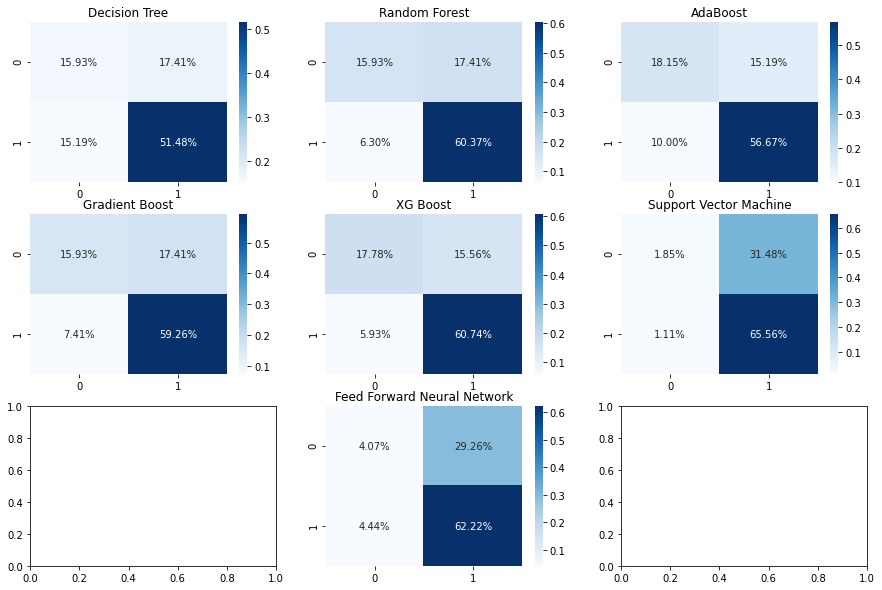

In [45]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
sns.heatmap(decision_tree_conf_matrix/np.sum(decision_tree_conf_matrix), annot=True, fmt='.2%', cmap='Blues',ax=ax[0,0]).set_title('Decision Tree')
sns.heatmap(random_forest_conf_matrix/np.sum(random_forest_conf_matrix), annot=True, fmt='.2%', cmap='Blues',ax=ax[0,1]).set_title('Random Forest')
sns.heatmap(ada_boost_conf_matrix/np.sum(ada_boost_conf_matrix), annot=True, fmt='.2%', cmap='Blues',ax=ax[0,2]).set_title('AdaBoost')
sns.heatmap(grad_boost_conf_matrix/np.sum(grad_boost_conf_matrix), annot=True, fmt='.2%', cmap='Blues',ax=ax[1,0]).set_title('Gradient Boost')
sns.heatmap(xg_boost_conf_matrix/np.sum(xg_boost_conf_matrix), annot=True, fmt='.2%', cmap='Blues',ax=ax[1,1]).set_title('XG Boost')
sns.heatmap(svc_conf_matrix/np.sum(svc_conf_matrix), annot=True, fmt='.2%', cmap='Blues',ax=ax[1,2]).set_title('Support Vector Machine')
sns.heatmap(feed_forward_conf_matrix/np.sum(feed_forward_conf_matrix), annot=True, fmt='.2%', cmap='Blues',ax=ax[2,1]).set_title('Feed Forward Neural Network')

# sns.heatmap(cm, annot=True, cmap='Blues',ax = ax[0,1]).set_title('AdaBoost')

plt.show()

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
acc_dec_tree = accuracy_score(Y_test, Y_predict_decision)
acc_rnd_forest = accuracy_score(Y_test, Y_predict_random)
acc_ada = accuracy_score(Y_test, Y_predict_ada)
acc_grad = accuracy_score(Y_test, Y_predict_gradient)
acc_xgb = accuracy_score(Y_test, Y_predict_xgb)
acc_svc = accuracy_score(Y_test, Y_predict_svc)
acc_feed = accuracy_score(Y_test, Y_predict_feed.argmax(axis=1))

In [0]:
from itertools import cycle, islice


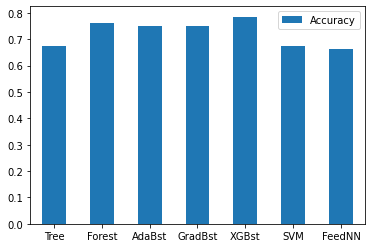

In [49]:
accuracy = [acc_dec_tree, acc_rnd_forest, acc_ada,acc_grad, acc_xgb, acc_svc,acc_feed]
# lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['Tree', 'Forest', 'AdaBst', 'GradBst', 'XGBst', 'SVM', 'FeedNN']
# df = pd.DataFrame({'speed': speed, 'lifespan': lifespan}, index=index)
df = pd.DataFrame({'Accuracy': accuracy}, index=index)
# my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df)))
ax = df.plot(kind='bar',rot=0)

# df.plot(kind='bar', stacked=True, color=my_colors)

**Feature selection with Filter Method**

In [0]:
original_df = pd.read_csv("german_data.csv", 
                  sep='\t', 
                  delimiter=',',
                  names=columns)

In [51]:
original_df['StatusExist']=original_df['StatusExist'].astype('category').cat.codes
original_df['CreditHistory']=original_df['CreditHistory'].astype('category').cat.codes
original_df['Purpose']=original_df['Purpose'].astype('category').cat.codes
original_df['SavingsAccount']=original_df['SavingsAccount'].astype('category').cat.codes
original_df['EmploymentSince']=original_df['EmploymentSince'].astype('category').cat.codes
original_df['StatusAndSex']=original_df['StatusAndSex'].astype('category').cat.codes
original_df['DebtorsGuarantors']=original_df['DebtorsGuarantors'].astype('category').cat.codes
original_df['OtherInstallPlans']=original_df['OtherInstallPlans'].astype('category').cat.codes
original_df['Property']=original_df['Property'].astype('category').cat.codes
original_df['Housing']=original_df['Housing'].astype('category').cat.codes
original_df['Job']=original_df['Job'].astype('category').cat.codes
original_df['Telephone']=original_df['Telephone'].astype('category').cat.codes
original_df['ForeignWorker']=original_df['ForeignWorker'].astype('category').cat.codes
original_df.corr()

StatusExist  ...    Target
StatusExist                     1.000000  ... -0.350847
DurationInMonth                -0.072013  ...  0.214927
CreditHistory                   0.192191  ... -0.228785
Purpose                         0.053223  ...  0.001514
CreditAmount                   -0.042705  ...  0.154739
SavingsAccount                  0.222867  ... -0.178943
EmploymentSince                 0.106339  ... -0.116002
InstallmentRate                -0.005280  ...  0.072404
StatusAndSex                    0.043261  ... -0.088184
DebtorsGuarantors              -0.127737  ... -0.025137
PresentResidenceSince          -0.042234  ...  0.002967
Property                       -0.032260  ...  0.142612
AgeInYears                      0.059751  ... -0.091127
OtherInstallPlans               0.046841  ... -0.109844
Housing                         0.022424  ... -0.019315
No.ExistingCredits              0.076005  ... -0.045732
Job                             0.040663  ...  0.032735
No.LiableProvideMaintenance    -0.014145  ... -0.003015
Telephone                       0.066296  ... -0.036466
ForeignWorker                  -0.026758  ... -0.082079
Target                         -0.350847  ...  1.000000

[21 rows x 21 columns]

In [52]:
d = {1: 1, 2: 0}
original_df['Target'] = original_df['Target'].map(d)
original_df.head()

StatusExist  DurationInMonth  ...  ForeignWorker  Target
0            0                6  ...              0       1
1            1               48  ...              0       0
2            3               12  ...              0       1
3            0               42  ...              0       1
4            0               24  ...              0       0

[5 rows x 21 columns]

In [0]:
original_df2 = original_df.copy()

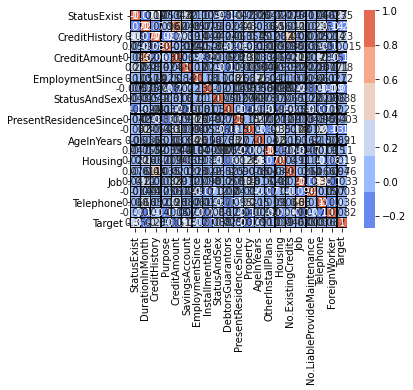

In [54]:
sns.heatmap(original_df.corr(),
            square=True,
            linewidths=0.25,    
            linecolor=(0,0,0),
           cmap=sns.color_palette("coolwarm"),
           annot=True)

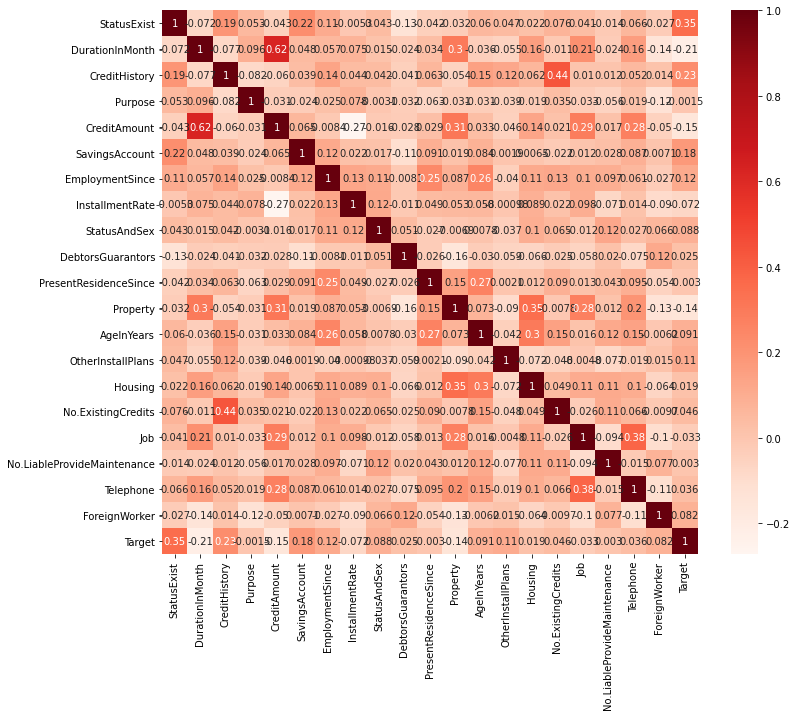

In [55]:
plt.figure(figsize=(12,10))
cor = original_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [56]:
#Correlation with output variable
cor_target = abs(cor["Target"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

StatusExist        0.350847
DurationInMonth    0.214927
CreditHistory      0.228785
Target             1.000000
Name: Target, dtype: float64

As we can see, only the features **DurationInMonth, StatusExist and CreditHistory** are highly correlated with the output variable **Target**. Althought, it's nearly to 0 but, These are the best top 3 ranks of correlation with Target feature. Hence we will drop all other features apart from these.

In [0]:
original_df2.drop(['Purpose'],axis=1,inplace=True)
original_df2.drop(['CreditAmount'],axis=1,inplace=True)
original_df2.drop(['SavingsAccount'],axis=1,inplace=True)
original_df2.drop(['EmploymentSince'],axis=1,inplace=True)
original_df2.drop(['InstallmentRate'],axis=1,inplace=True)
original_df2.drop(['StatusAndSex'],axis=1,inplace=True)
original_df2.drop(['DebtorsGuarantors'],axis=1,inplace=True)
original_df2.drop(['PresentResidenceSince'],axis=1,inplace=True)
original_df2.drop(['Property'],axis=1,inplace=True)
original_df2.drop(['AgeInYears'],axis=1,inplace=True)
original_df2.drop(['OtherInstallPlans'],axis=1,inplace=True)
original_df2.drop(['Housing'],axis=1,inplace=True)
original_df2.drop(['No.ExistingCredits'],axis=1,inplace=True)
original_df2.drop(['No.LiableProvideMaintenance'],axis=1,inplace=True)
original_df2.drop(['Telephone'],axis=1,inplace=True)
original_df2.drop(['ForeignWorker'],axis=1,inplace=True)
original_df2.drop(['Job'],axis=1,inplace=True)


In [58]:
features_df2 = list(original_df2.columns[:3])
features_df2


['StatusExist', 'DurationInMonth', 'CreditHistory']

In [0]:
y = original_df2["Target"]
X = original_df2[features_df2]
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.27)

**Decision Tree with Filter Method**

In [0]:
decision_model = tree.DecisionTreeClassifier()
decision_model = decision_model.fit(X_train,Y_train)

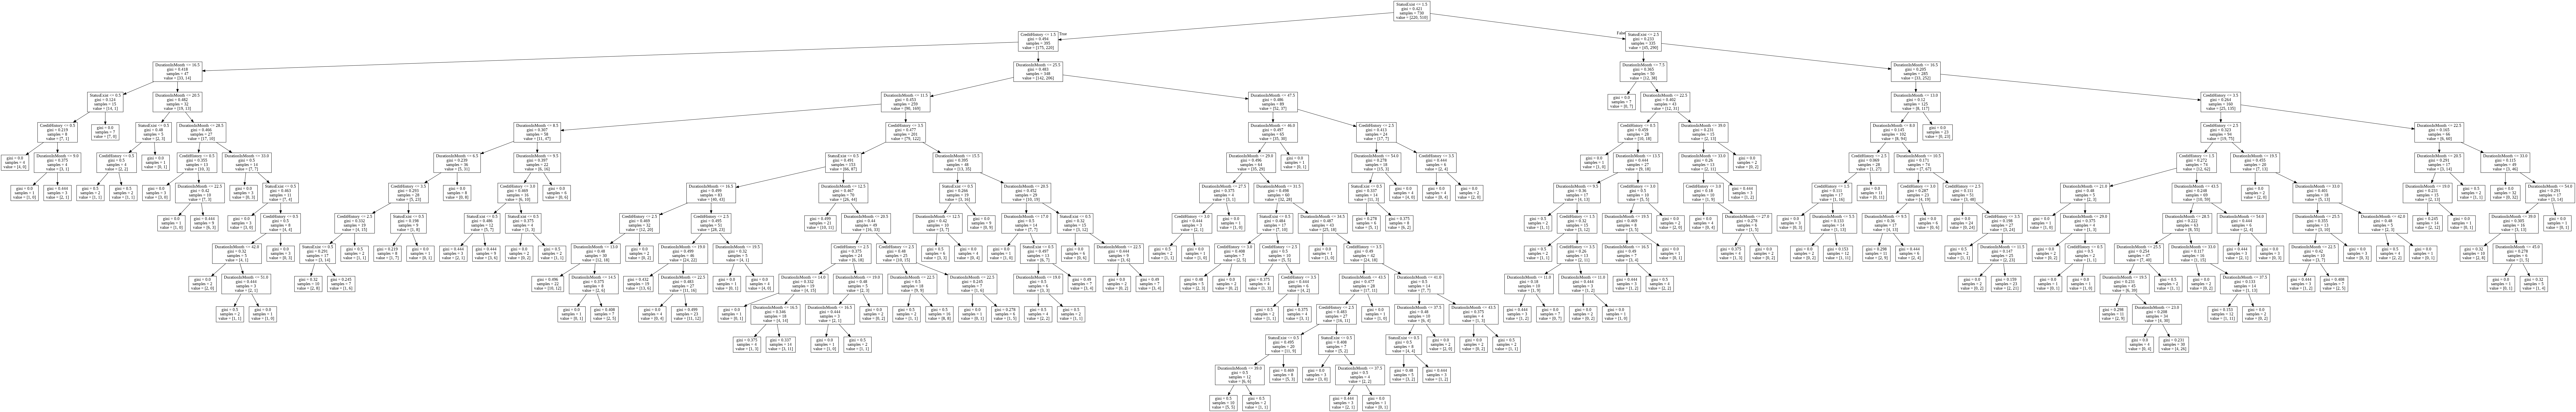

In [61]:
dot_data = StringIO()  
tree.export_graphviz(decision_model, out_file=dot_data,  
                         feature_names=features_df2)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [0]:
Y_predict_decision = decision_model.predict(X_test)

In [63]:
print(classification_report(Y_test,Y_predict_decision))

              precision    recall  f1-score   support

           0       0.50      0.44      0.47        80
           1       0.78      0.82      0.79       190

    accuracy                           0.70       270
   macro avg       0.64      0.63      0.63       270
weighted avg       0.69      0.70      0.70       270



**Random Forest with Filter Method**

In [0]:
randomForest = RandomForestClassifier(n_estimators=30)
randomForest = randomForest.fit(X_train, Y_train)

Y_predict_random = randomForest.predict(X_test)

In [65]:
print(classification_report(Y_test,Y_predict_random))

              precision    recall  f1-score   support

           0       0.52      0.35      0.42        80
           1       0.76      0.86      0.81       190

    accuracy                           0.71       270
   macro avg       0.64      0.61      0.61       270
weighted avg       0.69      0.71      0.69       270



**Gradient Boost with Filter Method**

In [0]:
gradient = GradientBoostingClassifier()
gradient = gradient.fit(X_train, Y_train)

Y_predict_gradient = gradient.predict(X_test)

In [67]:
print(classification_report(Y_test,Y_predict_gradient))

              precision    recall  f1-score   support

           0       0.59      0.34      0.43        80
           1       0.76      0.90      0.83       190

    accuracy                           0.73       270
   macro avg       0.68      0.62      0.63       270
weighted avg       0.71      0.73      0.71       270



**Ada Boost with Filter Method**

In [0]:
ada_model = AdaBoostClassifier()
ada_model = ada_model.fit(X_train, Y_train)

Y_predict_ada = ada_model.predict(X_test)

In [69]:
print(classification_report(Y_test,Y_predict_ada))

              precision    recall  f1-score   support

           0       0.61      0.38      0.47        80
           1       0.77      0.90      0.83       190

    accuracy                           0.74       270
   macro avg       0.69      0.64      0.65       270
weighted avg       0.73      0.74      0.72       270



**XG Boost with Filter Method**

In [0]:
xgb_model = XGBClassifier(n_estimators=100)
xgb_model.fit(X_train, Y_train)
Y_predict_xgb = xgb_model.predict(X_test)

In [71]:
print(classification_report(Y_test,Y_predict_xgb))

              precision    recall  f1-score   support

           0       0.63      0.36      0.46        80
           1       0.77      0.91      0.84       190

    accuracy                           0.75       270
   macro avg       0.70      0.64      0.65       270
weighted avg       0.73      0.75      0.72       270



**Support Vector Machine with Filter Method**

In [0]:
svc_model = SVC()
svc_model.fit(X_train, Y_train)
Y_predict_svc = svc_model.predict(X_test)

In [73]:
print(classification_report(Y_test,Y_predict_svc))

              precision    recall  f1-score   support

           0       0.67      0.10      0.17        80
           1       0.72      0.98      0.83       190

    accuracy                           0.72       270
   macro avg       0.69      0.54      0.50       270
weighted avg       0.70      0.72      0.64       270



**Feed Forward Neural Network with Filter Method**

In [74]:
dum_Y = pd.get_dummies(Y_train)
dum_Y.shape

(730, 2)

In [0]:
model = Sequential([
    Dense(2, input_shape=(3,),activation='relu' ),

    Dense(4, activation='relu'),

    Dense(8, activation='relu'),

    Dense(2, activation='softmax'),
])

In [0]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [77]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 2)                 8         
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 18        
Total params: 78
Trainable params: 78
Non-trainable params: 0
_________________________________________________________________


In [78]:
feed = model.fit(
    X_train,
    dum_Y,
    batch_size = 64,
    epochs=100,
)

Epoch 1/100
12/12 [==============================] - 0s 1ms/step - loss: 0.7643 - accuracy: 0.2973
Epoch 2/100
12/12 [==============================] - 0s 1ms/step - loss: 0.7213 - accuracy: 0.2973
Epoch 3/100
12/12 [==============================] - 0s 1ms/step - loss: 0.6903 - accuracy: 0.5753
Epoch 4/100
12/12 [==============================] - 0s 1ms/step - loss: 0.6685 - accuracy: 0.6986
Epoch 5/100
12/12 [==============================] - 0s 1ms/step - loss: 0.6503 - accuracy: 0.6986
Epoch 6/100
12/12 [==============================] - 0s 1ms/step - loss: 0.6358 - accuracy: 0.6986
Epoch 7/100
12/12 [==============================] - 0s 1ms/step - loss: 0.6221 - accuracy: 0.6986
Epoch 8/100
12/12 [==============================] - 0s 1ms/step - loss: 0.6106 - accuracy: 0.6986
Epoch 9/100
12/12 [==============================] - 0s 1ms/step - loss: 0.6015 - accuracy: 0.6986
Epoch 10/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5954 - accuracy: 0.6986
Epoch 11/

In [0]:
Y_predict_feed = model.predict(X_test)


In [0]:
dum_Y_test = pd.get_dummies(Y_test)

In [81]:
model.evaluate(X_test,dum_Y_test,steps=1)

1/1 [==============================] - 0s 1ms/step - loss: 0.4886 - accuracy: 0.7704


[0.4886150658130646, 0.770370364189148]

**Correlation Matrix with Filter Method**

In [0]:
ada_boost_conf_matrix = confusion_matrix(Y_test, Y_predict_ada )
grad_boost_conf_matrix = confusion_matrix(Y_test, Y_predict_gradient )
xg_boost_conf_matrix = confusion_matrix(Y_test, Y_predict_xgb )
random_forest_conf_matrix = confusion_matrix(Y_test, Y_predict_random )
svc_conf_matrix = confusion_matrix(Y_test, Y_predict_svc )
decision_tree_conf_matrix = confusion_matrix(Y_test, Y_predict_decision )
feed_forward_conf_matrix = confusion_matrix(Y_test, Y_predict_feed.argmax(axis=1) )

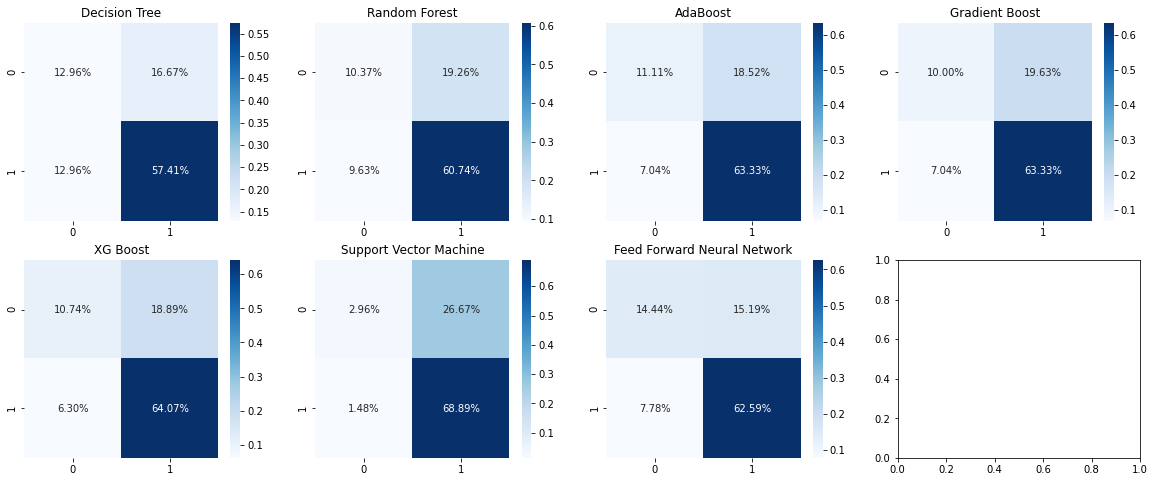

In [83]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20, 8))
sns.heatmap(decision_tree_conf_matrix/np.sum(decision_tree_conf_matrix), annot=True, fmt='.2%', cmap='Blues',ax=ax[0,0]).set_title('Decision Tree')
sns.heatmap(random_forest_conf_matrix/np.sum(random_forest_conf_matrix), annot=True, fmt='.2%', cmap='Blues',ax=ax[0,1]).set_title('Random Forest')
sns.heatmap(ada_boost_conf_matrix/np.sum(ada_boost_conf_matrix), annot=True, fmt='.2%', cmap='Blues',ax=ax[0,2]).set_title('AdaBoost')
sns.heatmap(grad_boost_conf_matrix/np.sum(grad_boost_conf_matrix), annot=True, fmt='.2%', cmap='Blues',ax=ax[0,3]).set_title('Gradient Boost')
sns.heatmap(xg_boost_conf_matrix/np.sum(xg_boost_conf_matrix), annot=True, fmt='.2%', cmap='Blues',ax=ax[1,0]).set_title('XG Boost')
sns.heatmap(svc_conf_matrix/np.sum(svc_conf_matrix), annot=True, fmt='.2%', cmap='Blues',ax=ax[1,1]).set_title('Support Vector Machine')
sns.heatmap(feed_forward_conf_matrix/np.sum(feed_forward_conf_matrix), annot=True, fmt='.2%', cmap='Blues',ax=ax[1,2]).set_title('Feed Forward Neural Network')

plt.show()

In [0]:
acc_dec_tree = accuracy_score(Y_test, Y_predict_decision)
acc_rnd_forest = accuracy_score(Y_test, Y_predict_random)
acc_ada = accuracy_score(Y_test, Y_predict_ada)
acc_grad = accuracy_score(Y_test, Y_predict_gradient)
acc_xgb = accuracy_score(Y_test, Y_predict_xgb)
acc_svc = accuracy_score(Y_test, Y_predict_svc)
acc_feed = accuracy_score(Y_test, Y_predict_feed.argmax(axis=1))

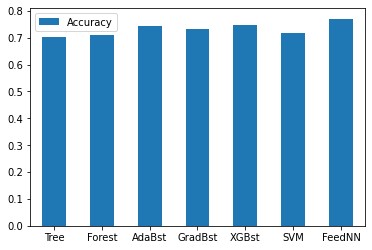

In [85]:
accuracy = [acc_dec_tree, acc_rnd_forest, acc_ada,acc_grad, acc_xgb, acc_svc,acc_feed]
# lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['Tree', 'Forest', 'AdaBst', 'GradBst', 'XGBst', 'SVM', 'FeedNN']
# df = pd.DataFrame({'speed': speed, 'lifespan': lifespan}, index=index)
df = pd.DataFrame({'Accuracy': accuracy}, index=index)
# my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df)))
ax = df.plot(kind='bar',rot=0)

# df.plot(kind='bar', stacked=True, color=my_colors)

**Feature Selection Embedded Method**
- Here we will do feature selection using Lasso regularization. If the feature is irrelevant, lasso penalizes it’s coefficient and make it 0. Hence the features with coefficient = 0 are removed and the rest are taken.

In [0]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [0]:
original_df3 = original_df.copy()

In [88]:
original_df3.head()

StatusExist  DurationInMonth  ...  ForeignWorker  Target
0            0                6  ...              0       1
1            1               48  ...              0       0
2            3               12  ...              0       1
3            0               42  ...              0       1
4            0               24  ...              0       0

[5 rows x 21 columns]

In [89]:
features = list(original_df3.columns[:20])
features

['StatusExist',
 'DurationInMonth',
 'CreditHistory',
 'Purpose',
 'CreditAmount',
 'SavingsAccount',
 'EmploymentSince',
 'InstallmentRate',
 'StatusAndSex',
 'DebtorsGuarantors',
 'PresentResidenceSince',
 'Property',
 'AgeInYears',
 'OtherInstallPlans',
 'Housing',
 'No.ExistingCredits',
 'Job',
 'No.LiableProvideMaintenance',
 'Telephone',
 'ForeignWorker']

In [0]:
y = original_df3["Target"]
X = original_df3[features]

In [91]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.200061
Best score using built-in LassoCV: 0.050807


In [92]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 3 variables and eliminated the other 17 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

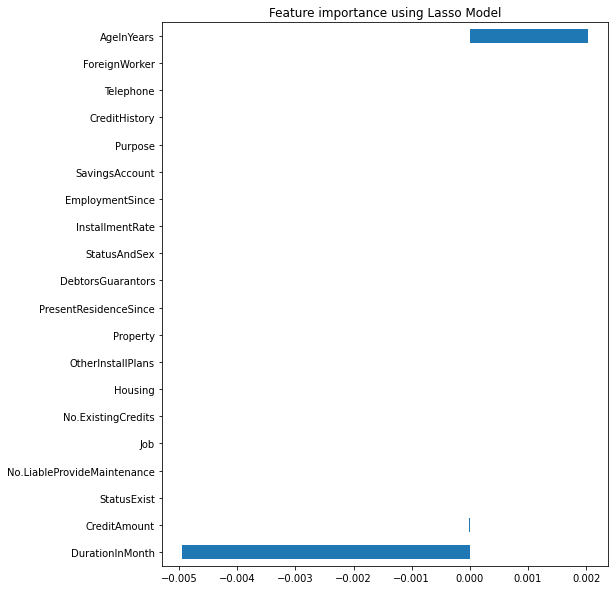

In [93]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

Here Lasso model has taken 3 features such as **DurationInMonth, CreditAmount, AgeInYears.**


In [0]:
columnsX = [ "DurationInMonth","AgeInYears","CreditAmount"]

In [0]:
y = original_df3["Target"]
X = original_df3[columnsX]

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.27)

**Decision Tree** with Embedded Method

In [0]:
decision_model = tree.DecisionTreeClassifier()
decision_model = decision_model.fit(X_train,Y_train)

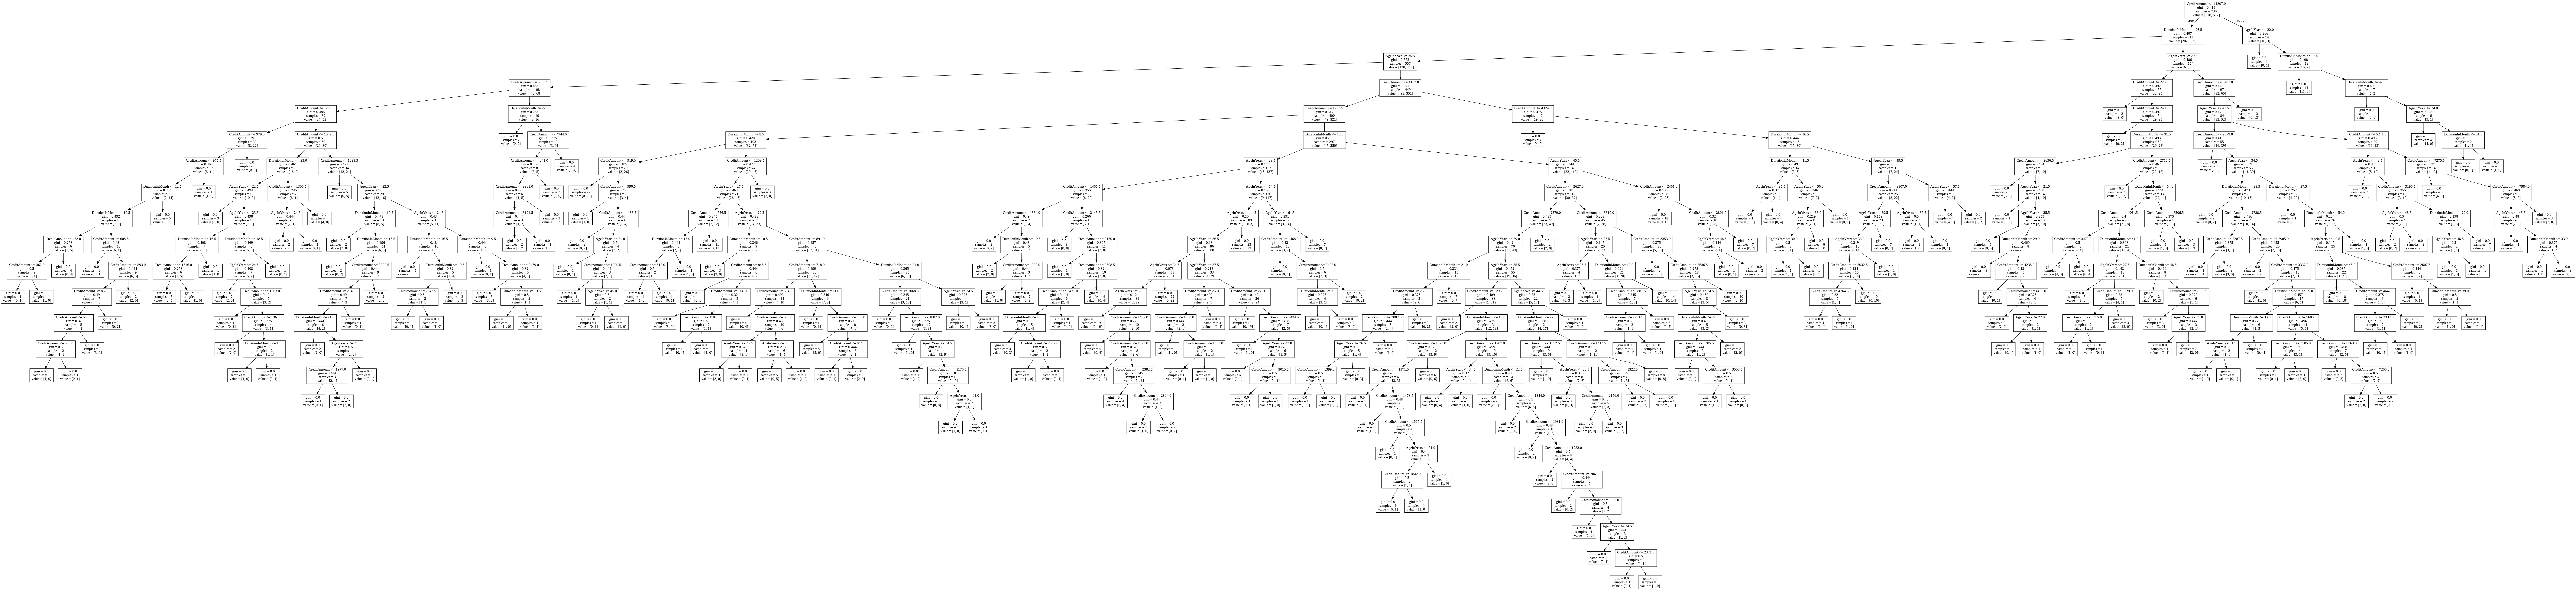

In [98]:
dot_data = StringIO()  
tree.export_graphviz(decision_model, out_file=dot_data,  
                         feature_names=columnsX)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [0]:
Y_predict_decision = decision_model.predict(X_test)

In [100]:
print(classification_report(Y_test,Y_predict_decision))

              precision    recall  f1-score   support

           0       0.49      0.52      0.51        82
           1       0.79      0.77      0.78       188

    accuracy                           0.69       270
   macro avg       0.64      0.65      0.64       270
weighted avg       0.70      0.69      0.70       270



**Random Forest** with Embedded Method

In [0]:
randomForest = RandomForestClassifier(n_estimators=30)
randomForest = randomForest.fit(X_train, Y_train)

Y_predict_random = randomForest.predict(X_test)

In [102]:
print(classification_report(Y_test,Y_predict_random))

              precision    recall  f1-score   support

           0       0.42      0.33      0.37        82
           1       0.73      0.80      0.76       188

    accuracy                           0.66       270
   macro avg       0.57      0.56      0.57       270
weighted avg       0.64      0.66      0.64       270



**Ada Boost** with Embedded Method

In [0]:
ada_model = AdaBoostClassifier()
ada_model = ada_model.fit(X_train, Y_train)

Y_predict_ada = ada_model.predict(X_test)


In [104]:
print(classification_report(Y_test,Y_predict_ada))

              precision    recall  f1-score   support

           0       0.52      0.18      0.27        82
           1       0.72      0.93      0.81       188

    accuracy                           0.70       270
   macro avg       0.62      0.55      0.54       270
weighted avg       0.66      0.70      0.65       270



**Gradient Boost** with Embedded Method

In [0]:
gradient = GradientBoostingClassifier()
gradient = gradient.fit(X_train, Y_train)

Y_predict_gradient = gradient.predict(X_test)

In [106]:
print(classification_report(Y_test,Y_predict_gradient))

              precision    recall  f1-score   support

           0       0.53      0.26      0.34        82
           1       0.73      0.90      0.81       188

    accuracy                           0.70       270
   macro avg       0.63      0.58      0.58       270
weighted avg       0.67      0.70      0.67       270



**XG Boost** with Embedded Method

In [0]:
xgb_model = XGBClassifier(n_estimators=100)
xgb_model.fit(X_train, Y_train)
Y_predict_xgb = xgb_model.predict(X_test)

In [108]:
print(classification_report(Y_test,Y_predict_xgb))

              precision    recall  f1-score   support

           0       0.57      0.21      0.30        82
           1       0.73      0.93      0.82       188

    accuracy                           0.71       270
   macro avg       0.65      0.57      0.56       270
weighted avg       0.68      0.71      0.66       270



**Support Vector Machine** with Embedded Method

In [0]:
svc_model = SVC()
svc_model.fit(X_train, Y_train)
Y_predict_svc = svc_model.predict(X_test)

In [110]:
print(classification_report(Y_test,Y_predict_svc))

              precision    recall  f1-score   support

           0       0.44      0.05      0.09        82
           1       0.70      0.97      0.82       188

    accuracy                           0.69       270
   macro avg       0.57      0.51      0.45       270
weighted avg       0.62      0.69      0.59       270



**Feed Forward Neural Network** with Embedded Method

In [111]:
dum_Y = pd.get_dummies(Y_train)
dum_Y.shape

(730, 2)

In [0]:
model = Sequential([
    Dense(2, input_shape=(3,),activation='relu' ),

    Dense(4, activation='relu'),

    Dense(8, activation='relu'),

    Dense(2, activation='softmax'),
])

In [0]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [114]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 2)                 8         
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 18        
Total params: 78
Trainable params: 78
Non-trainable params: 0
_________________________________________________________________


In [115]:
feed = model.fit(
    X_train,
    dum_Y,
    batch_size = 32,
    epochs=100,
)

Epoch 1/100
23/23 [==============================] - 0s 1ms/step - loss: 162.3628 - accuracy: 0.7014
Epoch 2/100
23/23 [==============================] - 0s 1ms/step - loss: 98.4305 - accuracy: 0.7014
Epoch 3/100
23/23 [==============================] - 0s 1ms/step - loss: 46.2459 - accuracy: 0.7014
Epoch 4/100
23/23 [==============================] - 0s 1ms/step - loss: 6.7443 - accuracy: 0.5753
Epoch 5/100
23/23 [==============================] - 0s 1ms/step - loss: 1.2052 - accuracy: 0.6000
Epoch 6/100
23/23 [==============================] - 0s 1ms/step - loss: 0.8738 - accuracy: 0.6178
Epoch 7/100
23/23 [==============================] - 0s 1ms/step - loss: 0.7075 - accuracy: 0.6808
Epoch 8/100
23/23 [==============================] - 0s 1ms/step - loss: 0.7003 - accuracy: 0.6411
Epoch 9/100
23/23 [==============================] - 0s 1ms/step - loss: 0.6373 - accuracy: 0.6836
Epoch 10/100
23/23 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.6740
Epoch

In [0]:
Y_predict_feed = model.predict(X_test)


In [0]:
dum_Y_test = pd.get_dummies(Y_test)

In [118]:
model.evaluate(X_test,dum_Y_test,steps=1)

1/1 [==============================] - 0s 1ms/step - loss: 0.6208 - accuracy: 0.6963


[0.6207852959632874, 0.6962962746620178]

**Confusion Matrix** each classification method with Embedded Method

In [0]:
ada_boost_conf_matrix = confusion_matrix(Y_test, Y_predict_ada )
grad_boost_conf_matrix = confusion_matrix(Y_test, Y_predict_gradient )
xg_boost_conf_matrix = confusion_matrix(Y_test, Y_predict_xgb )
random_forest_conf_matrix = confusion_matrix(Y_test, Y_predict_random )
svc_conf_matrix = confusion_matrix(Y_test, Y_predict_svc )
decision_tree_conf_matrix = confusion_matrix(Y_test, Y_predict_decision )
feed_forward_conf_matrix = confusion_matrix(Y_test, Y_predict_feed.argmax(axis=1) )

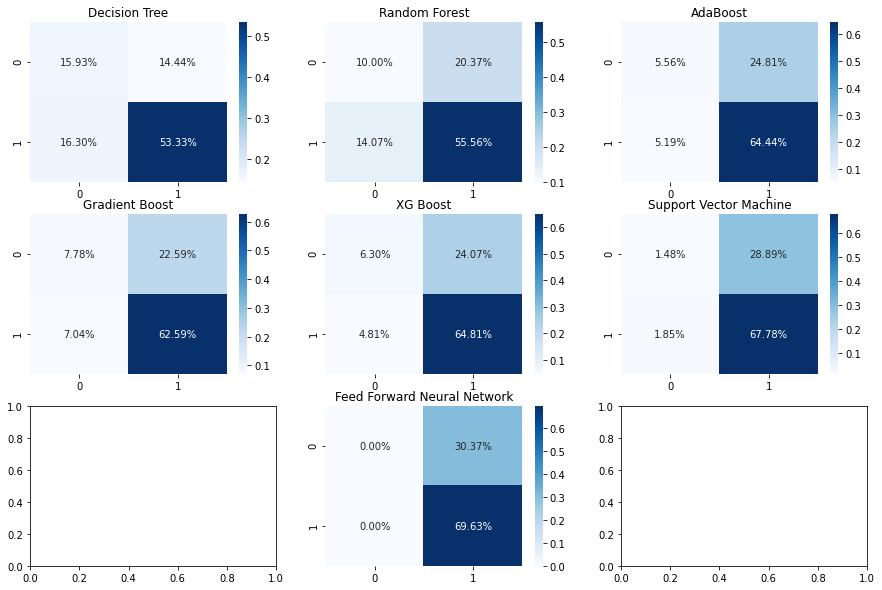

In [120]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
sns.heatmap(decision_tree_conf_matrix/np.sum(decision_tree_conf_matrix), annot=True, fmt='.2%', cmap='Blues',ax=ax[0,0]).set_title('Decision Tree')
sns.heatmap(random_forest_conf_matrix/np.sum(random_forest_conf_matrix), annot=True, fmt='.2%', cmap='Blues',ax=ax[0,1]).set_title('Random Forest')
sns.heatmap(ada_boost_conf_matrix/np.sum(ada_boost_conf_matrix), annot=True, fmt='.2%', cmap='Blues',ax=ax[0,2]).set_title('AdaBoost')
sns.heatmap(grad_boost_conf_matrix/np.sum(grad_boost_conf_matrix), annot=True, fmt='.2%', cmap='Blues',ax=ax[1,0]).set_title('Gradient Boost')
sns.heatmap(xg_boost_conf_matrix/np.sum(xg_boost_conf_matrix), annot=True, fmt='.2%', cmap='Blues',ax=ax[1,1]).set_title('XG Boost')
sns.heatmap(svc_conf_matrix/np.sum(svc_conf_matrix), annot=True, fmt='.2%', cmap='Blues',ax=ax[1,2]).set_title('Support Vector Machine')
sns.heatmap(feed_forward_conf_matrix/np.sum(feed_forward_conf_matrix), annot=True, fmt='.2%', cmap='Blues',ax=ax[2,1]).set_title('Feed Forward Neural Network')

plt.show()

In [0]:
acc_dec_tree = accuracy_score(Y_test, Y_predict_decision)
acc_rnd_forest = accuracy_score(Y_test, Y_predict_random)
acc_ada = accuracy_score(Y_test, Y_predict_ada)
acc_grad = accuracy_score(Y_test, Y_predict_gradient)
acc_xgb = accuracy_score(Y_test, Y_predict_xgb)
acc_svc = accuracy_score(Y_test, Y_predict_svc)
acc_feed = accuracy_score(Y_test, Y_predict_feed.argmax(axis=1))

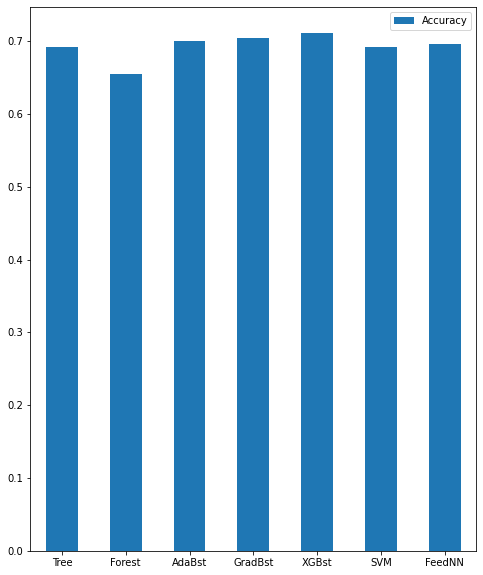

In [122]:
accuracy = [acc_dec_tree, acc_rnd_forest, acc_ada,acc_grad, acc_xgb, acc_svc,acc_feed]
index = ['Tree', 'Forest', 'AdaBst', 'GradBst', 'XGBst', 'SVM', 'FeedNN']
df = pd.DataFrame({'Accuracy': accuracy}, index=index)
ax = df.plot(kind='bar',rot=0)